# 1. 라이브러리 불러오기
---

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# 그래프를 노트북 안에 그리기 위해 설정
%matplotlib inline

# 2. 공통 스타일 지정하기
---
- [참고 깃헙(비공개)](https://github.com/aramssong/Udemy_Python/blob/main/3.%20%EB%8D%B0%EC%9D%B4%ED%84%B0%20%EC%8B%9C%EA%B0%81%ED%99%94/06-1%20%EA%B3%B5%ED%86%B5%20%EC%8A%A4%ED%83%80%EC%9D%BC%20%EC%A7%80%EC%A0%95%ED%95%98%EA%B8%B0_%EC%8B%A4%EC%8A%B5.ipynb)

In [2]:
# 한글 폰트 설정
plt.rcParams['font.family'] = 'Malgun Gothic'

# 마이너스 기호 깨지는 문제 해결
plt.rcParams['axes.unicode_minus'] = False

# figure 크기
# plt.rcParams['figure.figsize'] = (10, 7)

# 제목
plt.rcParams['axes.titlesize'] = 15
plt.rcParams['axes.titleweight'] = 'bold'

# 그리드 표시
plt.rcParams['axes.grid'] = True
plt.rcParams['grid.alpha'] = 0.3
plt.rcParams['grid.linestyle'] = '--'

# 폰트 크기
plt.rcParams['font.size'] = 12

# 3. 데이터 불러오기
---
- seaborn에 내장되어 있는 데이터를 불러온다.
- titanic 데이터
- [titanic 데이터 컬럼 설명](https://bskyvision.com/entry/python-seaborn-%EB%9D%BC%EC%9D%B4%EB%B8%8C%EB%9F%AC%EB%A6%AC%EA%B0%80-%EC%A0%9C%EA%B3%B5%ED%95%98%EB%8A%94-%ED%83%80%EC%9D%B4%ED%83%80%EB%8B%89-%EB%8D%B0%EC%9D%B4%ED%84%B0%EC%85%8B-%EC%84%A4%EB%AA%85)

In [3]:
import seaborn as sns

titanic = sns.load_dataset('titanic')
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


# 4. 데이터 전처리
---

In [4]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


## 4.1 결측치 처리

In [5]:
# 각 컬럼 별 결측치 갯수 확인
titanic.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [6]:
# deck : null 값이 대부분이기 때문에 제거
titanic.drop(['deck'], axis = 1, inplace = True)

In [7]:
# age에 있는 null 값은 많지 않으므로 null 값이 있는 데이터(행) 제거
titanic.dropna(inplace = True)

In [8]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 0 to 890
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     712 non-null    int64   
 1   pclass       712 non-null    int64   
 2   sex          712 non-null    object  
 3   age          712 non-null    float64 
 4   sibsp        712 non-null    int64   
 5   parch        712 non-null    int64   
 6   fare         712 non-null    float64 
 7   embarked     712 non-null    object  
 8   class        712 non-null    category
 9   who          712 non-null    object  
 10  adult_male   712 non-null    bool    
 11  embark_town  712 non-null    object  
 12  alive        712 non-null    object  
 13  alone        712 non-null    bool    
dtypes: bool(2), category(1), float64(2), int64(4), object(5)
memory usage: 69.0+ KB


## 4.2 불필요한 컬럼 제거

In [9]:
# survived : alive와 겹치기 때문에 제거
# sibsp,parch도 크게 필요하지 않으며, 동승여부인 alone 컬럼이 있기 때문에 제거
# pclass : class와 겹치기 때문에 제거
# embark_town : embarked와 겹치기 때문에 제거

titanic.drop(['survived', 'sibsp', 'parch', 'pclass', 'embark_town'], axis = 1, inplace = True)

In [10]:
titanic.head()

,sex,age,fare,embarked,class,who,adult_male,alive,alone
0,male,22.0,7.2500,S,Third,man,True,no,False
1,female,38.0,71.2833,C,First,woman,False,yes,False
2,female,26.0,7.9250,S,Third,woman,False,yes,True
3,female,35.0,53.1000,S,First,woman,False,yes,False
4,male,35.0,8.0500,S,Third,man,True,no,True


## 4.3 자료형 변경

In [11]:
titanic['alone'] = titanic['alone'].astype('category')

In [12]:
titanic.dtypes

sex             object
age            float64
fare           float64
embarked        object
class         category
who             object
adult_male        bool
alive           object
alone         category
dtype: object

# 5. 컬럼 데이터 시각화
---
- 막대 그래프 : [참고 깃헙(비공개)](https://github.com/aramssong/Udemy_Python/blob/main/3.%20%EB%8D%B0%EC%9D%B4%ED%84%B0%20%EC%8B%9C%EA%B0%81%ED%99%94/04-1%20%EB%8D%B0%EC%9D%B4%ED%84%B0%EC%9D%98%20%ED%81%AC%EA%B8%B0%EB%A5%BC%20%EB%B9%84%EA%B5%90%ED%95%98%EB%8A%94%20%EB%A7%89%EB%8C%80%EA%B7%B8%EB%9E%98%ED%94%84_%EC%8B%A4%EC%8A%B5.ipynb)
- 히스토그램 : [참고 깃헙(비공개)](https://github.com/aramssong/Udemy_Python/blob/main/3.%20%EB%8D%B0%EC%9D%B4%ED%84%B0%20%EC%8B%9C%EA%B0%81%ED%99%94/05-1%20%EB%8D%B0%EC%9D%B4%ED%84%B0%EC%9D%98%20%EB%8F%84%EC%88%98%EB%B6%84%ED%8F%AC%EB%A5%BC%20%ED%91%9C%ED%98%84%ED%95%98%EB%8A%94%20%ED%9E%88%EC%8A%A4%ED%86%A0%EA%B7%B8%EB%9E%A8_%EC%8B%A4%EC%8A%B5.ipynb)
- 히트맵 : [참고 깃헙(비공개)](https://github.com/aramssong/Udemy_Python/blob/main/3.%20%EB%8D%B0%EC%9D%B4%ED%84%B0%20%EC%8B%9C%EA%B0%81%ED%99%94/04-3%20%EC%83%89%EC%9C%BC%EB%A1%9C%20%EA%B0%92%EC%9D%98%20%ED%81%AC%EA%B8%B0%EB%A5%BC%20%20%ED%91%9C%ED%98%84%ED%95%98%EB%8A%94%20%ED%9E%88%ED%8A%B8%EB%A7%B5_%EC%8B%A4%EC%8A%B5.ipynb)

## 5.1 생존자 수 확인

In [13]:
alive = titanic['alive'].value_counts().to_frame()
alive

,alive
no,424
yes,288


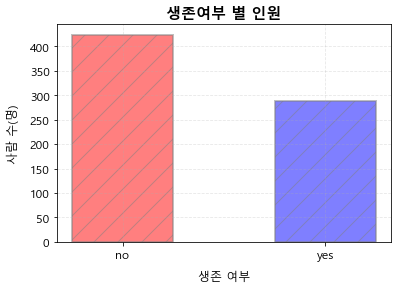

In [14]:
plt.bar(alive.index, alive['alive']
       , width = 0.5         # 막대 폭
       , color = ['r', 'b']  # 막대 색상
       , alpha = 0.5         # 막대 색상 투명도
       , edgecolor = 'gray'  # 막대 테두리 색상
       , linewidth = 2       # 막대 테두리 굵기
       , hatch = '/')        # 막대 내 패턴 모양

plt.title('생존여부 별 인원')

# labelpad : 레이블과 그래프와의 간격
plt.xlabel('생존 여부', labelpad = 10, fontsize = 12)
plt.ylabel('사람 수(명)', labelpad = 10, fontsize = 12)

plt.show()

## 5.2 객실 등급

In [15]:
pclass = titanic['class'].value_counts().to_frame()
pclass = pclass.sort_index()
pclass

,class
First,184
Second,173
Third,355


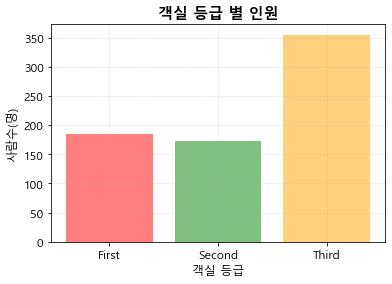

In [16]:
plt.bar(pclass.index, pclass['class']
       , color = ['r', 'g', 'orange']
       , alpha = 0.5)

plt.title('객실 등급 별 인원')

plt.xlabel('객실 등급')
plt.ylabel('사람수(명)')

plt.show()

## 5.3 성별

In [17]:
sex = titanic['sex'].value_counts().to_frame()
sex

,sex
male,453
female,259


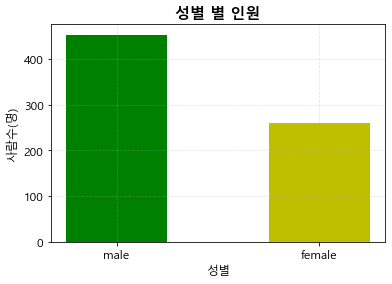

In [18]:
plt.bar(sex.index, sex['sex']
       , width = 0.5
       , color = ['g', 'y'])

plt.title('성별 별 인원')

plt.xlabel('성별')
plt.ylabel('사람수(명)')

plt.show()

## 5.4 동행 여부

In [19]:
alone = titanic['alone'].value_counts().to_frame()
alone.index = ['alone', 'together']
alone

,alone
alone,402
together,310


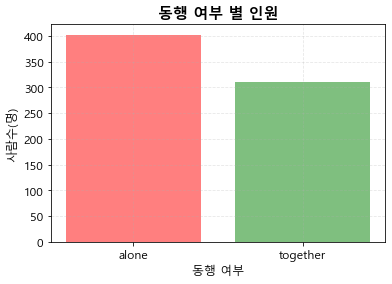

In [20]:
plt.bar(alone.index, alone['alone']
       , color = ['r', 'g']
       , alpha = 0.5)

plt.title('동행 여부 별 인원')

plt.xlabel('동행 여부')
plt.ylabel('사람수(명)')

plt.show()

## 5.5 탑승지

In [21]:
embarked = titanic['embarked'].value_counts().to_frame()
embarked

,embarked
S,554
C,130
Q,28


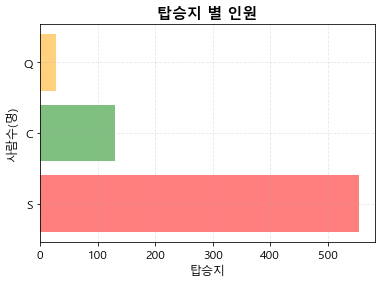

In [22]:
plt.barh(embarked.index, embarked['embarked']
        , color = ['r', 'g', 'orange']
        , alpha = 0.5)

plt.title('탑승지 별 인원')

plt.xlabel('탑승지')
plt.ylabel('사람수(명)')

plt.show()

## 5.6 나이

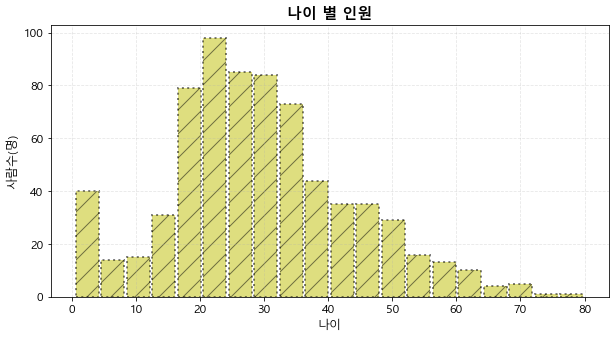

In [23]:
plt.figure(figsize = (10, 5))

plt.hist(titanic['age']
        , bins = 20     # 구간의 갯수
        , rwidth = 0.9  # 막대의 폭
        , color = 'y'   # 막대 색상
        , alpha = 0.5   # 막대 색상 투명도
        , ec = 'k'      # 막대 테두리 색상
        , lw = 2        # 테두리 두께
        , ls = ':'      # 테두리 스타일
        , hatch = '/')  # 패턴 모양

plt.title('나이 별 인원')

plt.xlabel('나이')
plt.ylabel('사람수(명)')

plt.show()

## 5.7 연령대 - 객실 등급 별 인원

### 5.7.1 연령대 컬럼 생성

In [24]:
titanic['age_range'] = (titanic['age'] / 10).astype('int') * 10
titanic.head()

,sex,age,fare,embarked,class,who,adult_male,alive,alone,age_range
0,male,22.0,7.2500,S,Third,man,True,no,False,20
1,female,38.0,71.2833,C,First,woman,False,yes,False,30
2,female,26.0,7.9250,S,Third,woman,False,yes,True,20
3,female,35.0,53.1000,S,First,woman,False,yes,False,30
4,male,35.0,8.0500,S,Third,man,True,no,True,30


### 5.7.2 피벗테이블 (연령대 - 객실 등급)

In [25]:
age_class = titanic.pivot_table(index = 'class'
                                , columns = 'age_range'
                                , values = 'alive'
                                , aggfunc = 'count')
age_class

age_range,0,10,20,30,40,50,60,70,80
class,,,,,,,,,
First,3,18,34,49,37,27,12,3,1
Second,17,18,53,48,18,15,3,1,0
Third,42,66,133,69,34,6,3,2,0


### 5.7.3 시각화

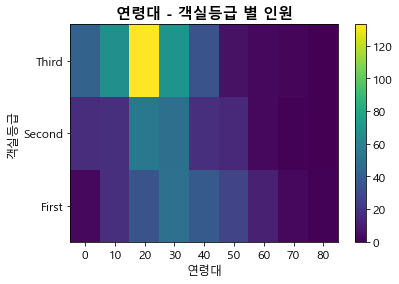

In [26]:
# matplotlib
plt.pcolor(age_class)  # 히트맵
plt.colorbar() # 컬러바 생성

plt.xticks(np.arange(0.5, len(age_class.columns), 1), labels = age_class.columns)
plt.yticks(np.arange(0.5, len(age_class.index), 1), labels = age_class.index)

plt.title('연령대 - 객실등급 별 인원')

plt.xlabel('연령대')
plt.ylabel('객실등급')

plt.show()

<AxesSubplot:xlabel='age_range', ylabel='class'>

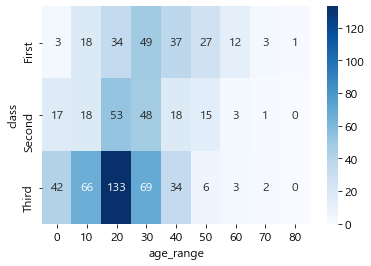

In [27]:
# seaborn

sns.heatmap(age_class
           , cmap = 'Blues'  # 색상
           , annot = True    # 히트맵 내 수치 표현
           , fmt = 'd')      # 정수로 표시